## Sobre o Desafio

O objetivo deste exercício é construir um modelo de *machine learning* capaz de prever o valor do aluguel de um imóvel com base em suas características. Através da análise de um dataset de imóveis, você irá:

1. **Explorar os dados:** Realizar uma análise exploratória dos dados para entender a distribuição das variáveis, identificar possíveis outliers e correlações.  
2. **Preparar os dados:** Limpar os dados, tratar valores ausentes e codificar variáveis categóricas.  
3. **Construir um modelo:** Utilizar um algoritmo de regressão linear para construir um modelo que relacione as características do imóvel com o valor do aluguel.  
4. **Avaliar o modelo:** Avaliar a performance do modelo utilizando métricas adequadas e analisar os resíduos para verificar a qualidade das previsões.  
5. **Interpretar os resultados:** Analisar os coeficientes do modelo para entender a importância de cada variável na previsão do valor do aluguel.  

---

### Etapas

1. **Carregar e explorar o dataset:**
   - Carregue o arquivo CSV fornecido.
   - Explore os dados utilizando as funções do `pandas`.

2. **Pré-processamento:**
   - Identifique e trate valores ausentes.
   - Remova outliers.
   - Codifique as variáveis categóricas.
   - Escale as variáveis numéricas (se necessário).

3. **Construção do modelo:**
   - Divida os dados em conjuntos de treino e teste.
   - Crie um *pipeline* para pré-processar os dados e treinar o modelo de regressão linear.
   - Treine o modelo utilizando o conjunto de treino.

4. **Avaliação do modelo:**
   - Faça previsões sobre o conjunto de teste.
   - Calcule métricas de desempenho: `R²`, `MAE`, `RMSE`.
   - Analise os resíduos para verificar a qualidade do modelo.

5. **Interpretação dos resultados:**
   - Analise os coeficientes do modelo para entender a importância de cada variável.
   - Discuta as limitações do modelo e sugira possíveis melhorias.


In [6]:
import pandas as pd

# Carregar a base de dados
file_path = './datasets/dataset_aluguel.csv'
df_aluguel = pd.read_csv(file_path)

In [4]:
# Verificar as primeiras linhas do dataset
df_aluguel.head()

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [5]:
# Verificar a estrutura do dataset
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [7]:
# Verificar valores únicos nas colunas categóricas
for column in df_aluguel.select_dtypes(include=['object']).columns:
    print(f"{column} valores únicos: {df_aluguel[column].unique()}")

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore
import pingouin as pg
import joblib

In [9]:
# Remover a coluna 'id'
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

In [11]:
# Visualizar as primeiras linhas dos dados
df_aluguel.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [12]:
# Analisar valores únicos das colunas categóricas
df_aluguel.select_dtypes(include=['bool']).nunique()

localizacao_Periferia    2
localizacao_Subúrbio     2
dtype: int64

In [14]:
# Verificar valores nulos
df_aluguel.isna().sum()


tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

In [15]:
# Estatísticas descritivas
df_aluguel.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


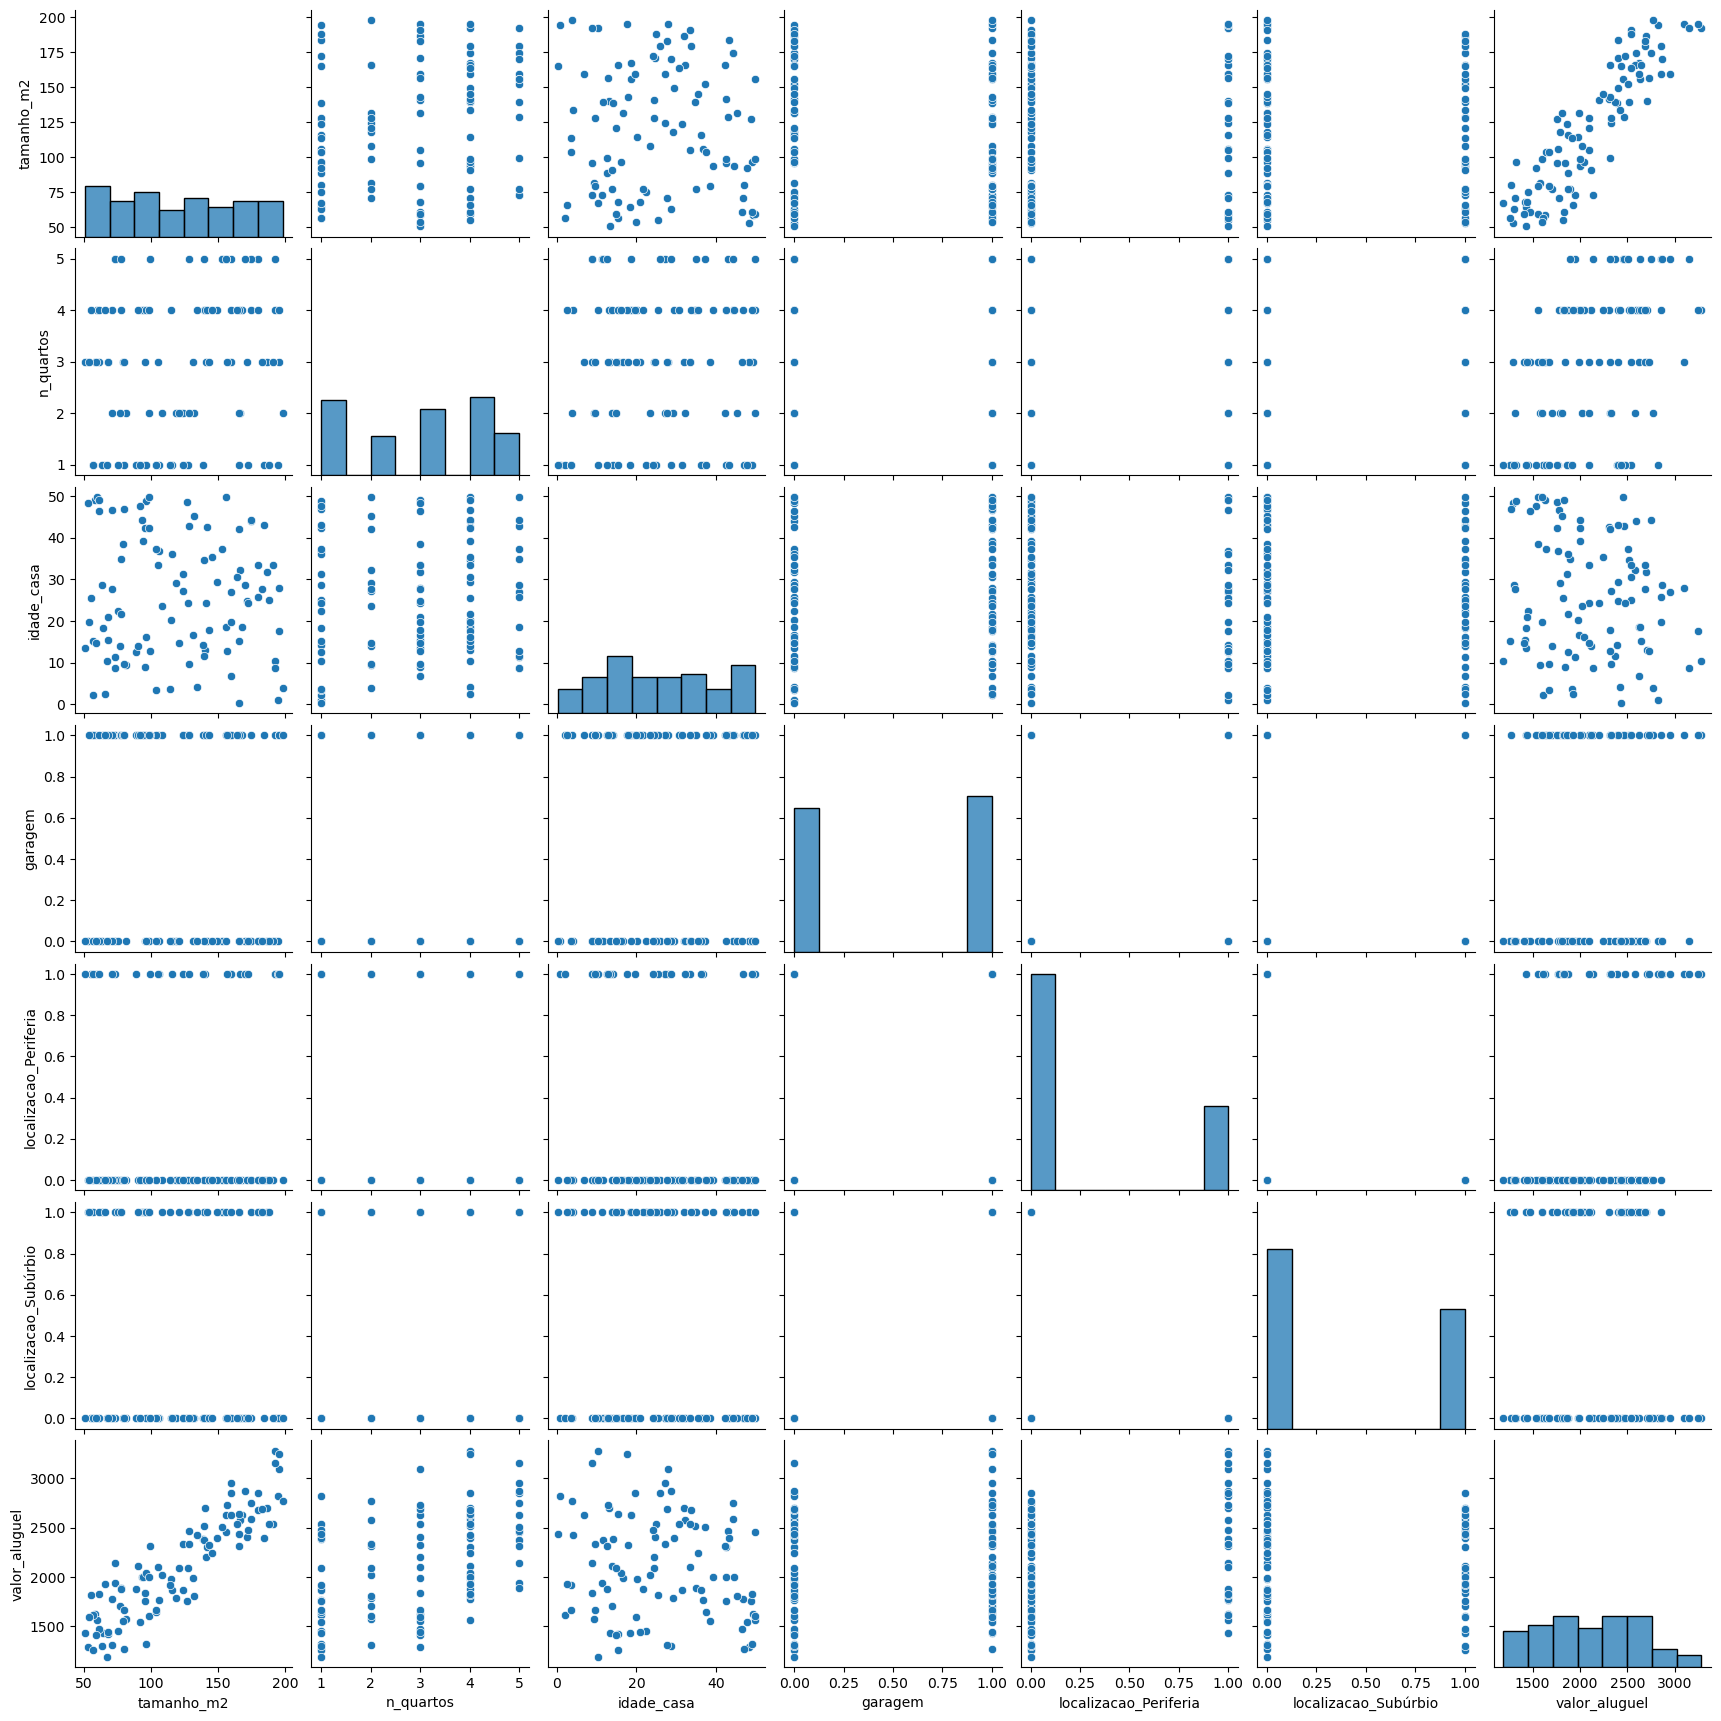

In [16]:
# Visualização das variáveis
sns.pairplot(df_aluguel)
plt.show()

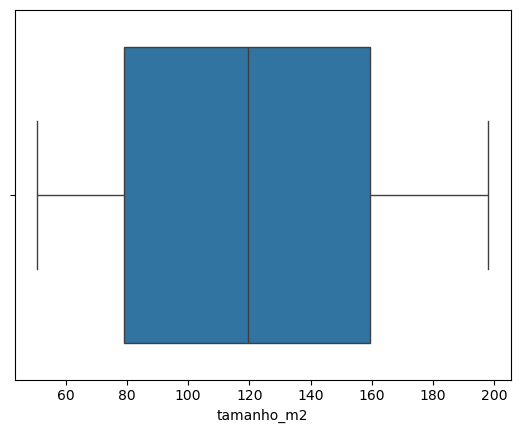

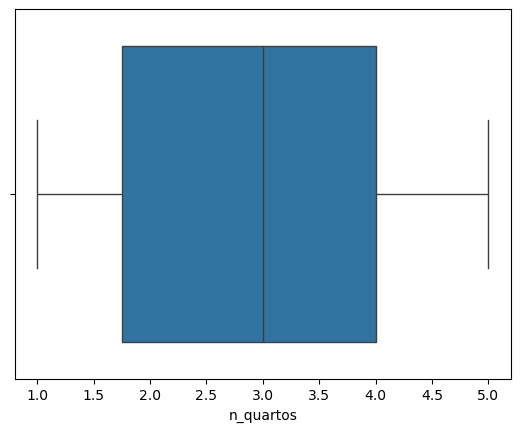

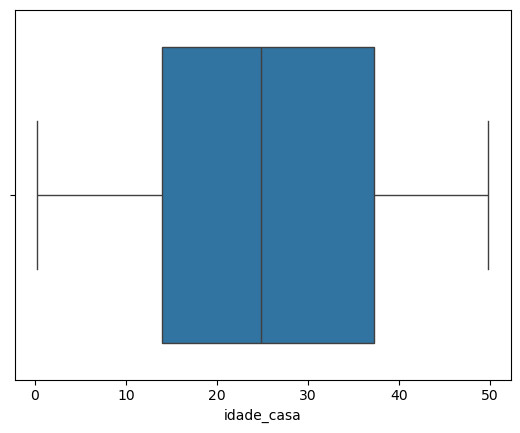

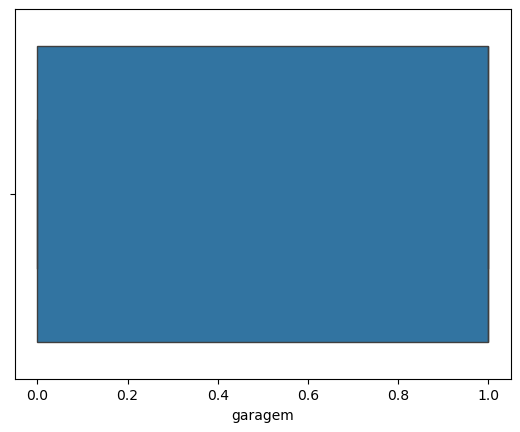

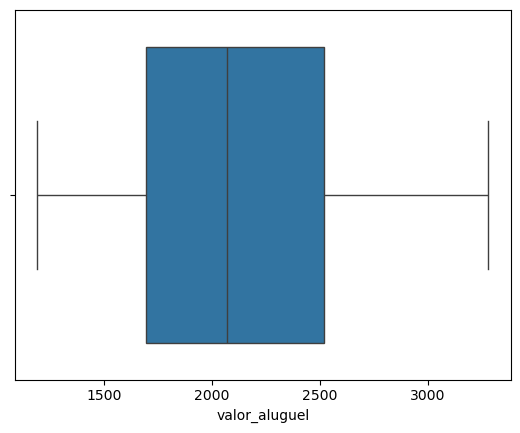

In [17]:
# Tratar outliers
sns.boxplot(data=df_aluguel, x='tamanho_m2')
plt.show()
sns.boxplot(data=df_aluguel, x='n_quartos')
plt.show()
sns.boxplot(data=df_aluguel, x='idade_casa')
plt.show()
sns.boxplot(data=df_aluguel, x='garagem')
plt.show()
sns.boxplot(data=df_aluguel, x='valor_aluguel')
plt.show()

In [18]:
# Remover outliers baseados na variável 'valor_aluguel' (exemplo)
df_aluguel = df_aluguel[df_aluguel['valor_aluguel'] < df_aluguel['valor_aluguel'].quantile(0.95)]

In [19]:
# Codificar variáveis categóricas
df_aluguel = pd.get_dummies(df_aluguel, columns=['localizacao_Periferia', 'localizacao_Subúrbio'], dtype='int64')

In [20]:
# Separar em conjuntos de treino e teste
X = df_aluguel.drop(columns='valor_aluguel', axis=1)
y = df_aluguel['valor_aluguel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [21]:
# Definir colunas numéricas
colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem']

In [22]:
# Criar pipeline de pré-processamento e modelo
transformer_numericas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

model_regr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression()),
    ]
)

In [23]:
# Treinar o modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho_m2', 'n_quartos',
                                                   'idade_casa',
                                                   'garagem'])])),
                ('regressor', LinearRegression())])

In [28]:
# Previsões e avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred = model_regr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

R²: 0.932202968369209
MAE: 93.70235270972046
RMSE: 114.47558148024318


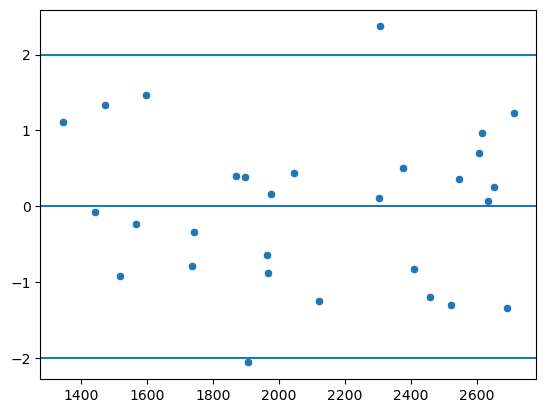

In [25]:
# Análise dos resíduos
residuos = y_test - y_pred
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)
plt.show()

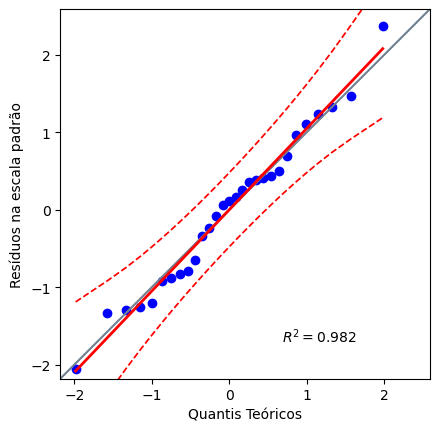

In [29]:
# Testes de normalidade e heterocedasticidade nos resíduos
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [30]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [31]:
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatística do Teste Shapiro-Wilk: {stat_shapiro} e P-Value: {p_value_shapiro}")

stat_KS, p_value_KS = kstest(residuos, 'norm')
print(f"Estatística do Teste KS: {stat_KS} e P-Value: {p_value_KS}")

stat_ll, p_value_ll = lilliefors(residuos, 'norm', pvalmethod='table')
print(f"Estatística do Teste Lilliefors: {stat_ll} e P-Value: {p_value_ll}")

stat_and, critical_and, significance_and = anderson(residuos, 'norm')
print(f"Estatística do Teste Anderson-Darling: {stat_and} e Valor Crítico: {critical_and[2]}")


Estatística do Teste Shapiro-Wilk: 0.9832211151050118 e P-Value: 0.9113572494759601
Estatística do Teste KS: 0.5517241379310324 e P-Value: 8.003447647095403e-09
Estatística do Teste Lilliefors: 0.08986554820919246 e P-Value: 0.786776199604255
Estatística do Teste Anderson-Darling: 0.2310963389927032 e Valor Crítico: 0.71


In [32]:
X_test_transformed = preprocessor.transform(X_test)
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print(f"Estatística do Teste Goldfeld-Quandt: {stat_goldfeld} e P-Value: {p_value_goldfeld}")

Estatística do Teste Goldfeld-Quandt: 1.8271955940254399 e P-Value: 0.16852042487324104


In [33]:
# Salvando o modelo
joblib.dump(model_regr, './modelo_aluguel.pkl')

['./modelo_aluguel.pkl']